<div>
    <h3>Quick report of life and death</h3>
    <h4>Source</h4>
    <div>git pull https://github.com/CSSEGISandData/COVID-19.git</div>
    <div>Country comparison of sum and rolling increase of reported cases and death.</div>
</div>

In [49]:
import pandas as pd
import datetime as dtt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.shape

(264, 85)

In [133]:
country = df.loc[df['Country/Region'].str.contains('Italy|United Kingdom')].groupby('Country/Region').sum()
country.drop(['Lat','Long'], axis = 1, inplace = True)
country = country.T
country['UKDaily'] = country[['United Kingdom']].diff(axis = 0, periods = 1)
country['IDaily'] = country[['Italy']].diff(axis = 0, periods = 1)

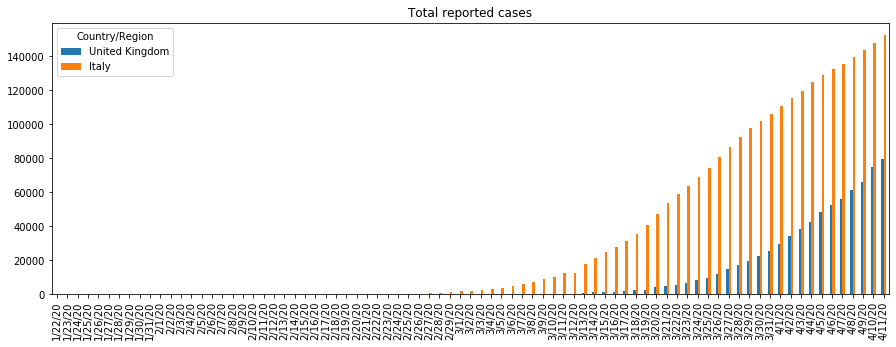

In [134]:
country[['United Kingdom','Italy']].plot(kind ='bar', figsize = (15,5), title = 'Total reported cases')

In [135]:
death = pd.read_csv('time_series_covid19_deaths_global.csv')
countryD = death.loc[death['Country/Region'].str.contains('United Kingdom|Italy')].groupby\
('Country/Region').sum()

In [136]:
countryD.drop(['Lat','Long'], axis = 1, inplace = True)
countryD = countryD.T
countryD['UKDaily'] = countryD[['United Kingdom']].diff(axis = 0, periods = 1)
countryD['IDaily'] = countryD[['Italy']].diff(axis = 0, periods = 1)

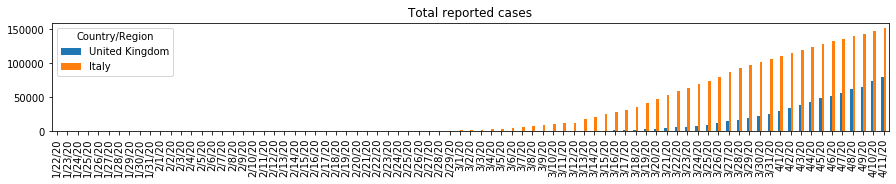

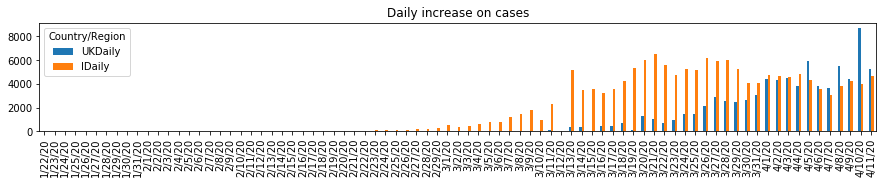

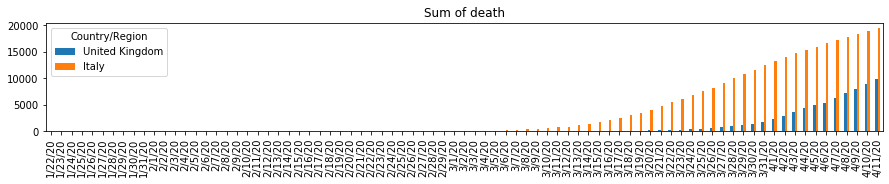

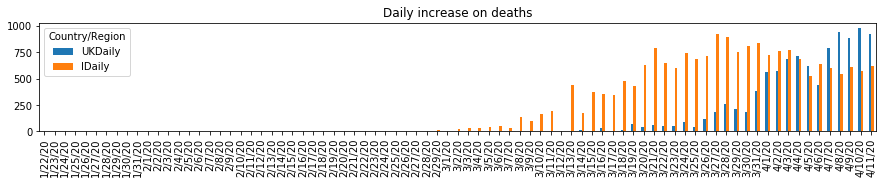

In [137]:
country[['United Kingdom','Italy']].plot(kind ='bar', figsize = (15,2), title = 'Total reported cases');
country[['UKDaily','IDaily']].plot(kind ='bar', figsize = (15,2), title = 'Daily increase on cases');
countryD[['United Kingdom','Italy']].plot(kind='bar', figsize = (15,2), title = 'Sum of death');
countryD[['UKDaily','IDaily']].plot(kind ='bar', figsize = (15,2), title = 'Daily increase on deaths');

In [138]:
print('Total reported cases/报告病例总数')
country[-1:]

Total reported cases/报告病例总数


Country/Region,Italy,United Kingdom,UKDaily,IDaily
4/11/20,152271,79874,5269.0,4694.0


In [139]:
print('Total reported Deaths/报告死亡总数')
countryD[-1:]

Total reported Deaths/报告死亡总数


Country/Region,Italy,United Kingdom,UKDaily,IDaily
4/11/20,19468,9892,918.0,619.0
